C:\Users\MANOJ KUMAR T\AppData\Local\Temp\ipykernel_41288\1014770978.py:15: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
12:33:19 - cmdstanpy - INFO - Chain [1] start processing
12:33:19 - cmdstanpy - INFO - Chain [1] done processing


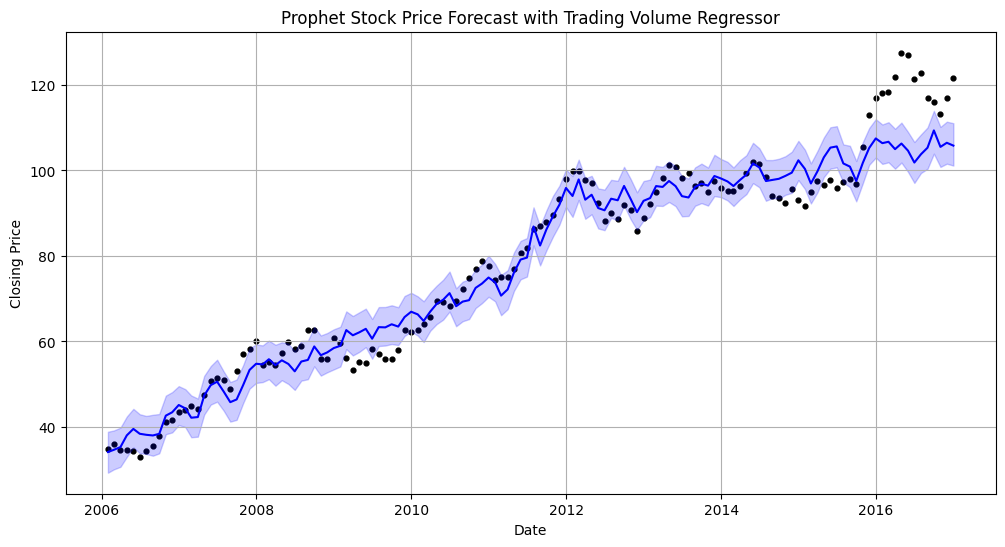

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import train_test_split

# -------------------------------
# 1. Load dataset
# -------------------------------
# Example CSV columns:
# Date, Open, High, Low, Close, Volume, SMA_10, SMA_30, SES

df = pd.read_csv("ML471_S4_Datafile_Practice.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# -------------------------------
# 2. Prepare data for Prophet
# Prophet requires:
# ds -> date
# y  -> target variable
# -------------------------------
prophet_df = df[['Date', 'Close', 'Volume']].rename(
    columns={'Date': 'ds', 'Close': 'y'}
)

# -------------------------------
# 3. Train-test split
# -------------------------------
train_size = int(len(prophet_df) * 0.8)
train_df = prophet_df.iloc[:train_size]
test_df  = prophet_df.iloc[train_size:]

# -------------------------------
# 4. Define Prophet model
# -------------------------------
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Add external regressor
model.add_regressor('Volume')

# -------------------------------
# 5. Fit the model
# -------------------------------
model.fit(train_df)

# -------------------------------
# 6. Create future dataframe
# -------------------------------
future = model.make_future_dataframe(
    periods=len(test_df),
    freq='ME'
)

# Add volume values for future
future['Volume'] = prophet_df['Volume'].values

# -------------------------------
# 7. Forecast
# -------------------------------
forecast = model.predict(future)

# -------------------------------
# 8. Plot results
# -------------------------------
plt.figure(figsize=(12, 6))

# Actual values
plt.scatter(
    prophet_df['ds'],
    prophet_df['y'],
    color='black',
    s=12,
    label='Observed Prices'
)

# Predicted values
plt.plot(
    forecast['ds'],
    forecast['yhat'],
    color='blue',
    label='Forecast'
)

# Confidence interval
plt.fill_between(
    forecast['ds'],
    forecast['yhat_lower'],
    forecast['yhat_upper'],
    color='blue',
    alpha=0.2,
    label='Uncertainty Interval'
)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Prophet Stock Price Forecast with Trading Volume Regressor")
# plt.legend()
plt.grid(True)
plt.show()
